In [2]:
#pip install pandasql

In [3]:
import pandas as pd
import os
import pandasql as ps
import glob
import matplotlib.pyplot as plt
import numpy as np
os.chdir('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/')

In [4]:
data=pd.read_csv(glob.glob('*.csv')[0])

In [5]:
dic={'1':'Kitchen','2':'Living Room','3':'Laundry Room','4':'Office Room','5':'Bathroom','6':'North building',
    '7':'Ironing Room','8':'Teenager room','9':'Parents room'}

In [64]:
list(dic.values())

['Kitchen',
 'Living Room',
 'Laundry Room',
 'Office Room',
 'Bathroom',
 'North building',
 'Ironing Room',
 'Teenager room',
 'Parents room']

In [47]:
ids=np.linspace(1,len(data),len(data)).astype(int)
data['Sample ID']=ids

In [7]:
data['date'][0], data['date'][0][17:19]

('2016-01-11 17:00:00', '00')

In [8]:
yr=np.array([data['date'][i][0:4] for i in range(len(data['date']))]).astype(int)
mon=np.array([data['date'][i][5:7] for i in range(len(data['date']))]).astype(int)
day=np.array([data['date'][i][8:10] for i in range(len(data['date']))]).astype(int)
hr=np.array([data['date'][i][11:13] for i in range(len(data['date']))]).astype(int)
m=np.array([data['date'][i][14:16] for i in range(len(data['date']))]).astype(int)
s=np.array([data['date'][i][17:19] for i in range(len(data['date']))]).astype(int)

In [9]:
data['Year']=yr
data['Month']=mon
data['Day']=day
data['Hour']=hr
data['Min']=m
data['Sec']=s

In [10]:
try:
    data=data.drop(columns=['rv1','rv2'])
except:
    print('Deleted already')

Deleted already


In [11]:
#ps.sqldf("select Appliances from data where Day='11'")

In [12]:
#Creating additional attributes
def create_cats_temp(T,T_outside):
    labels=[]
    for i,x in enumerate(T):
        if x-T_outside[i]>0:
            labels.append('Hotter than surroundings')
        elif x-T_outside[i]<0:
            labels.append('Colder than surroundings')
        else:
            labels.append('Same temperature as surroundings')
    return labels

def create_cats_hum(RH,RH_outside):
    labels=[]
    for i,x in enumerate(RH):
        if x-RH_outside[i]>0:
            labels.append('More humid than surroundings')
        elif x-T_outside[i]<0:
            labels.append('Less humid than surroundings')
        else:
            labels.append('Same humidity as surroundings')
    return labels            

In [13]:
T_out=data['T_out']
RH_out=data['RH_out']
Ts=['T1','T2','T3','T4','T5','T6','T7','T8','T9']
RHs=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']

In [14]:
for x in Ts:
    data[f'{x}_flag']=create_cats_temp(data[x],T_out)
for x in RHs:
    data[f'{x}_flag']=create_cats_temp(data[x],RH_out)

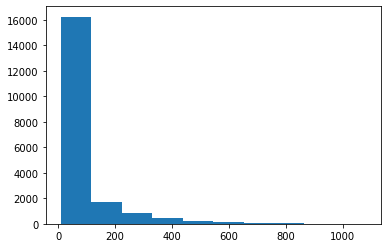

In [15]:
plt.hist(data['Appliances'])
plt.show()

In [16]:
app_ratings=[]
for x in data['Appliances']:
    if x<=100:
        app_ratings.append('Low Energy Use')
    elif (x>100) and (x<=300):
        app_ratings.append('Moderate Energy Use')
    else:
        app_ratings.append('High Energy Use')
data['Appliances_flag']=app_ratings

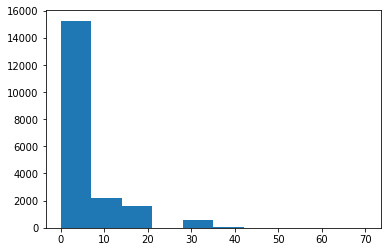

In [17]:
plt.hist(data['lights'])
plt.show()

In [18]:
light_ratings=[]
for x in data['lights']:
    if x<=10:
        light_ratings.append('Low Light Use')
    elif (x>10) and (x<=25):
        light_ratings.append('Moderate Light Use')
    else:
        light_ratings.append('High Light Use')
data['lights_flag']=light_ratings

In [19]:
dews=[]
for i in range(len(data['Tdewpoint'])):
    if data['Tdewpoint'][i]>=data['T_out'][i]:
        dews.append('Dew is likely')
    else:
        dews.append('Dew is unlikely')
data['Dew']=dews

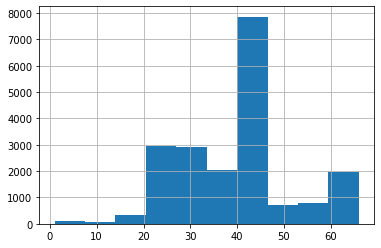

In [20]:
data['Visibility'].hist()

In [21]:
visibility_flag=[]
for x in data['Visibility']:
    if x<=20:
        visibility_flag.append('Low visibility')
    elif (x>20) and (x<=45):
        visibility_flag.append('Moderate visibility')
    else:
        visibility_flag.append('High visibility')
data['Visibility_flag']=visibility_flag

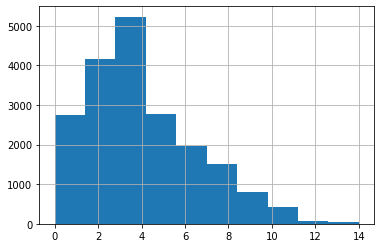

In [22]:
data['Windspeed'].hist()
#https://www.windows2universe.org/earth/Atmosphere/wind_speeds.html

In [23]:
wind_flag=[]
for x in data['Windspeed']:
    if x<1:
        wind_flag.append('Calm')
    elif (x>=1) and (x<5):
        wind_flag.append('Light Air')
    elif (x>=5) and (x<10):
        wind_flag.append('Light breeze')
    elif (x>=10):
        wind_flag.append('Windy breeze')
data['Windspeed_flag']=wind_flag        

In [31]:
press_flag=[]
for x in data['Press_mm_hg']:
    if (x-760)==0:
        press_flag.append('Atmospheric pressure')
    elif (x-760)>0:
        press_flag.append('Above atmospheric pressure')
    elif (x-760)<0:
        press_flag.append('Below atmospheric pressure')
data['Pressure_flag']=press_flag

In [33]:
data.columns

Index(['Unnamed: 0', 'date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2',
       'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Year', 'Month', 'Day', 'Hour',
       'Min', 'Sec', 'T1_flag', 'T2_flag', 'T3_flag', 'T4_flag', 'T5_flag',
       'T6_flag', 'T7_flag', 'T8_flag', 'T9_flag', 'RH_1_flag', 'RH_2_flag',
       'RH_3_flag', 'RH_4_flag', 'RH_5_flag', 'RH_6_flag', 'RH_7_flag',
       'RH_8_flag', 'RH_9_flag', 'Appliances_flag', 'lights_flag', 'Dew',
       'Visibility_flag', 'Windspeed_flag', 'Pressure_flag'],
      dtype='object')

In [25]:
len(ps.sqldf("select date from data where Appliances_flag='Low Energy Use' AND Visibility_flag='Moderate visibility'"))

12096

In [34]:
data.columns

Index(['Unnamed: 0', 'date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2',
       'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Year', 'Month', 'Day', 'Hour',
       'Min', 'Sec', 'T1_flag', 'T2_flag', 'T3_flag', 'T4_flag', 'T5_flag',
       'T6_flag', 'T7_flag', 'T8_flag', 'T9_flag', 'RH_1_flag', 'RH_2_flag',
       'RH_3_flag', 'RH_4_flag', 'RH_5_flag', 'RH_6_flag', 'RH_7_flag',
       'RH_8_flag', 'RH_9_flag', 'Appliances_flag', 'lights_flag', 'Dew',
       'Visibility_flag', 'Windspeed_flag', 'Pressure_flag'],
      dtype='object')

In [48]:
times=data[['Sample ID','Year','Month','Day','Hour','Min','Sec']]
times.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/times.csv',index=False)

In [50]:
common_areas=data[['Sample ID','T1','RH_1','T2','RH_2','T5','RH_5']]
common_areas.columns=['Sample ID','T_Kitchen','RH_Kitchen','T_LivingRoom','RH_LivingRoom','T_Bathroom','RH_Bathroom']
common_areas.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/commonareas.csv',index=False)

In [51]:
personal_areas=data[['Sample ID','T8','RH_8','T9','RH_9']]
personal_areas.columns=['Sample ID','T_Teenagerroom','RH_Teenagerroom','T_Parentsroom','RH_Parentsroom']
personal_areas.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/personalareas.csv',index=False)

In [52]:
subordinate_areas=data[['Sample ID','T3','RH_3','T4','RH_4','T6','RH_6','T7','RH_7']]
subordinate_areas.columns=['Sample ID','T_Laundryroom','RH_Laundryroom','T_Officeroom','RH_Officeroom','T_Northend','RH_Northend','T_Ironingroom','RH_Ironingroom']
subordinate_areas.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/subordinateareas.csv',index=False)

In [56]:
weather=data[['Sample ID','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
weather.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/weather.csv',index=False)

In [73]:
ts=['Sample ID']+[f'T{i}_flag' for i in range(1,10)]
temp_flags=data[ts]
temp_flags.columns=['Sample ID']+list(dic.values())
temp_flags.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/tempflags.csv',index=False)

In [74]:
rhs=['Sample ID']+[f'RH_{i}_flag' for i in range(1,10)]
RH_flags=data[rhs]
RH_flags.columns=['Sample ID']+list(dic.values())
RH_flags.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/RHflags.csv',index=False)

In [78]:
use=data[['Sample ID','Appliances','Appliances_flag','lights','lights_flag']]
use.columns=['Sample ID','Appliances','Appliance Use Type','lights','lights Use Type']
use.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/use.csv',index=False)

In [81]:
outside=data[['Sample ID','Dew','Visibility_flag', 'Windspeed_flag', 'Pressure_flag']]
outside.columns=['Sample ID','Dew','Visibility','Windspeed','Pressure']
outside.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Project_datafiles/outside.csv',index=False)